In [1]:
import matplotlib.pyplot as plt
from scipy.io import arff
from sklearn.cluster import KMeans
import numpy as np
import time


# AVANT LE 10/11 RAPPORT

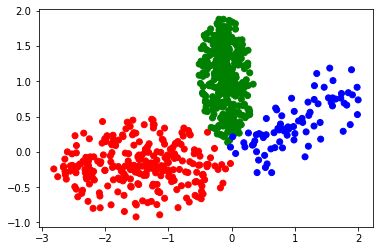

In [2]:
data = arff.loadarff(open('/home/picco/5A/Analyse Descriptive/clustering-benchmark/src/main/resources/datasets/artificial/2d-3c-no123.arff','r'))

def visualisationSolution(data):
    X, Y, Color = [], [], []

    for point in data[0]:
        #print(point)
        X.append(point[0])
        Y.append(point[1])
        #print(type((str(point[2]))))
        if(str(point[2]) == "b'0'"):
            Color.append("r")
        elif(str(point[2]) == "b'1'"):
            Color.append("g")
        else:
            Color.append("b")

    plt.scatter(X, Y, c=Color)
    plt.show()

def visualisation(data, color):
    X, Y, Color = [], [], []

    for i in range(len(data[0])):
        #print(point)
        X.append(data[0][i][0])
        Y.append(data[0][i][1])
  

    plt.scatter(X, Y, c=color, s=1)
    plt.show()

visualisationSolution(data)

# Debut

In [3]:
def convertirData(data):
    X = []
    for point in data[0]:
        #print(point)
        X.append([point[0],point[1]])
    array = np.array(X)
    return (array)

#convertirData(data)

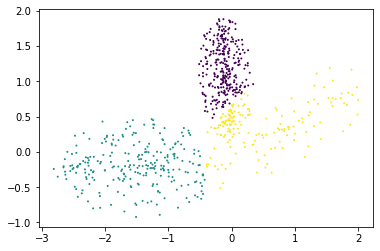

In [4]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(convertirData(data))
visualisation(data, kmeans.labels_)

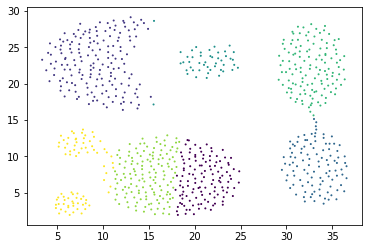

In [5]:
data = arff.loadarff(open('/home/picco/5A/Analyse Descriptive/clustering-benchmark/src/main/resources/datasets/artificial/aggregation.arff','r'))
kmeans = KMeans(n_clusters=7, random_state=0, init='k-means++').fit(convertirData(data))
visualisation(data, kmeans.labels_)

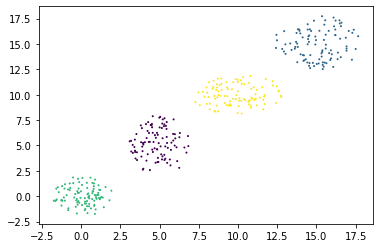

In [6]:
data = arff.loadarff(open('/home/picco/5A/Analyse Descriptive/clustering-benchmark/src/main/resources/datasets/artificial/spherical_4_3.arff','r'))
kmeans = KMeans(n_clusters=4, random_state=0, init='k-means++').fit(convertirData(data))
visualisation(data, kmeans.labels_)


# Score

In [7]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

In [8]:

def trouverKSilhouette(data, r=20):
    print("Début de Silhouette")
    start_time = time.time()
    
    nMeilleur = 0
    scoreMeilleur = 0
    scoreActuel = 0
    
    listeN = []
    listeScore = []
    
    for n in range(2, r+1):
        kmeans = KMeans(n_clusters=n, random_state=0, init='k-means++').fit(convertirData(data))
        scoreActuel = silhouette_score(convertirData(data), kmeans.labels_)

        if(scoreActuel > scoreMeilleur):
            scoreMeilleur = scoreActuel
            nMeilleur = n
        
        listeN.append(n)
        listeScore.append(scoreActuel)
            
    print(str(nMeilleur) + " : " + str(scoreMeilleur))
    print("--- %s seconds ---" % (time.time() - start_time))
    
    plt.plot(listeN, listeScore)
    plt.show()
    
    return nMeilleur


def trouverKDavies(data, r=20):
    print("Début de Davies")
    start_time = time.time()
    
    nMeilleur = 0
    scoreMeilleur = 0
    scoreActuel = 0
    
    listeN = []
    listeScore = []
    
    for n in range(2, r+1):
        kmeans = KMeans(n_clusters=n, random_state=0, init='k-means++').fit(convertirData(data))
        scoreActuel = davies_bouldin_score(convertirData(data), kmeans.labels_)

        if(scoreActuel > scoreMeilleur):
            scoreMeilleur = scoreActuel
            nMeilleur = n
            
        listeN.append(n)
        listeScore.append(scoreActuel)
            
    print(str(nMeilleur) + " : " + str(scoreMeilleur))
    print("--- %s seconds ---" % (time.time() - start_time))
    
    plt.plot(listeN, listeScore)
    plt.show()
    
    return nMeilleur


def trouverKCal(data, r=20):
    print("Début de Calinski")
    start_time = time.time()
    
    nMeilleur = 0
    scoreMeilleur = 0
    scoreActuel = 0
    
    listeN = []
    listeScore = []
    
    for n in range(2, r+1):
        kmeans = KMeans(n_clusters=n, random_state=0, init='k-means++').fit(convertirData(data))
        scoreActuel = calinski_harabasz_score(convertirData(data), kmeans.labels_)

        if(scoreActuel > scoreMeilleur):
            scoreMeilleur = scoreActuel
            nMeilleur = n
            
        listeN.append(n)
        listeScore.append(scoreActuel)
            
    print(str(nMeilleur) + " : " + str(scoreMeilleur))
    print("--- %s seconds ---" % (time.time() - start_time))
    
    plt.plot(listeN, listeScore)
    plt.show()
    
    return nMeilleur


def trouverK(data):
    s = trouverKSilhouette(data)
    d = trouverKDavies(data)
    c = trouverKCal(data)
    
    return c
    
    
    
    
    

Début de Silhouette
4 : 0.6897634267742783
--- 0.706416130065918 seconds ---


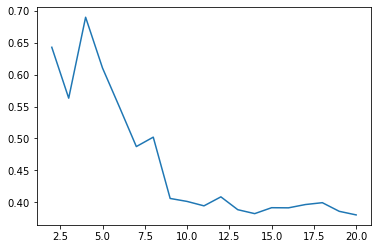

Début de Davies
9 : 0.9281680905734331
--- 0.6533427238464355 seconds ---


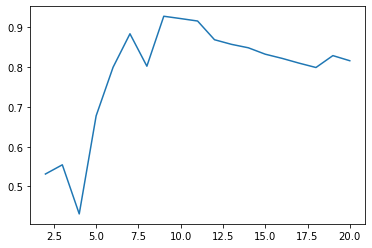

Début de Calinski
4 : 3163.316548734048
--- 0.6187658309936523 seconds ---


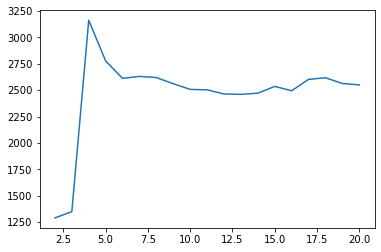

4

In [9]:
trouverK(data)

In [10]:
def tempsSilhouette(data, rmax = 100):
    print("Début de Silhouette en temps")
    
    listeN = []
    listeTemps = []
    
    for r in range(3, rmax):
        start_time = time.time()

        nMeilleur = 0
        scoreMeilleur = 0
        scoreActuel = 0

        for n in range(2, r+1):
            kmeans = KMeans(n_clusters=n, random_state=0, init='k-means++').fit(convertirData(data))
            scoreActuel = silhouette_score(convertirData(data), kmeans.labels_)

            if(scoreActuel > scoreMeilleur):
                scoreMeilleur = scoreActuel
                nMeilleur = n

        listeN.append(r)
        listeTemps.append(time.time() - start_time)

        
    plt.plot(listeN, listeTemps)
    plt.show()

Début de Silhouette en temps


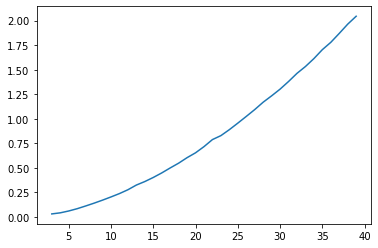

In [11]:
tempsSilhouette(data, 40)

# Limite

Début de Silhouette
20 : 0.4061315375479777
--- 0.7622387409210205 seconds ---


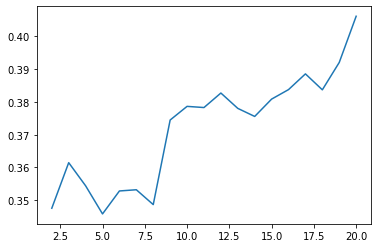

Début de Davies
2 : 1.1684561185868998
--- 0.7641956806182861 seconds ---


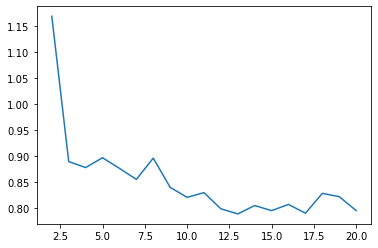

Début de Calinski
18 : 283.9711217564988
--- 0.7283298969268799 seconds ---


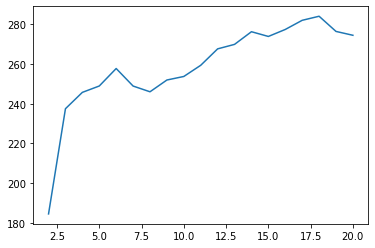

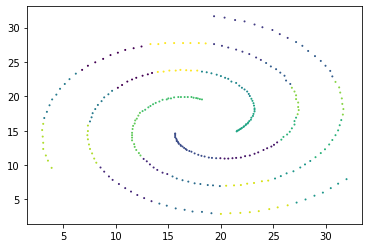

In [12]:
data = arff.loadarff(open('/home/picco/5A/Analyse Descriptive/clustering-benchmark/src/main/resources/datasets/artificial/3-spiral.arff','r'))
k = trouverK(data)
kmeans = KMeans(n_clusters=k, random_state=0, init='k-means++').fit(convertirData(data))
visualisation(data, kmeans.labels_)


Début de Silhouette
3 : 0.36888924507684434
--- 6.058220863342285 seconds ---


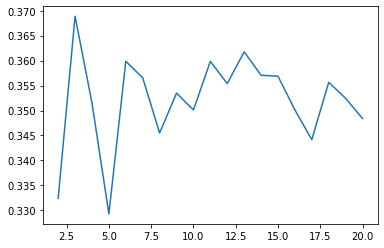

Début de Davies
2 : 1.233917410210905
--- 2.879826307296753 seconds ---


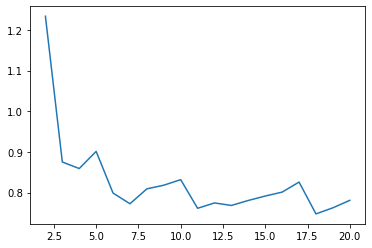

Début de Calinski
19 : 4215.368846728446
--- 2.8374311923980713 seconds ---


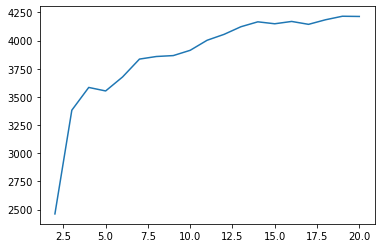

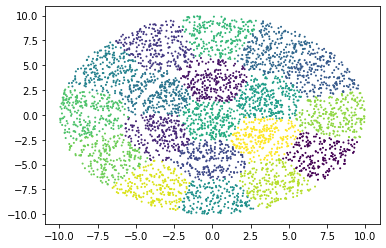

In [13]:
data = arff.loadarff(open('/home/picco/5A/Analyse Descriptive/clustering-benchmark/src/main/resources/datasets/artificial/disk-4500n.arff','r'))
k = trouverK(data)
kmeans = KMeans(n_clusters=k, random_state=0, init='k-means++').fit(convertirData(data))
visualisation(data, kmeans.labels_)


#### Une autre métrique aurait aidé à trouver les bons résultats précédement. Mais ici, c'est ma méthode k-means elle même qui pose problème

# Clustering agglomératif

In [14]:
from sklearn.cluster import AgglomerativeClustering

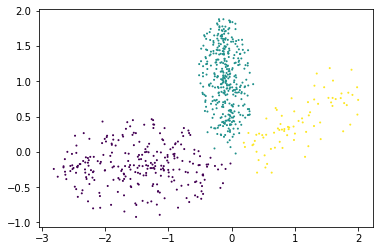

In [15]:
data = arff.loadarff(open('/home/picco/5A/Analyse Descriptive/clustering-benchmark/src/main/resources/datasets/artificial/2d-3c-no123.arff','r'))

clustering = AgglomerativeClustering(n_clusters=3).fit(convertirData(data))

visualisation(data, clustering.labels_)




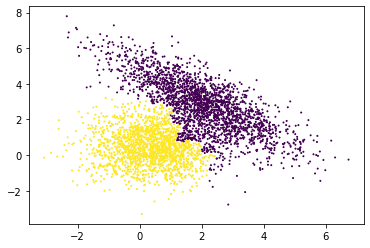

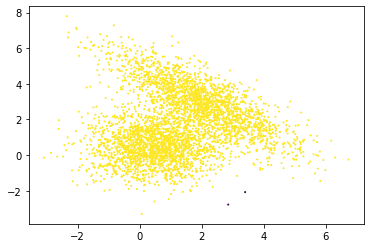

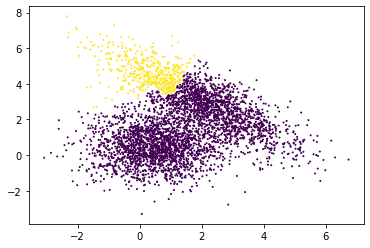

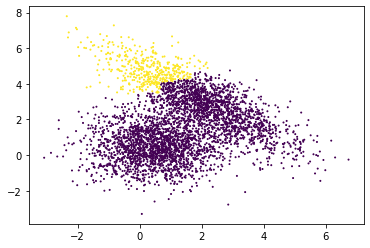

In [16]:
data = arff.loadarff(open('/home/picco/5A/Analyse Descriptive/clustering-benchmark/src/main/resources/datasets/artificial/engytime.arff','r'))

clustering = AgglomerativeClustering(n_clusters=2, linkage='ward').fit(convertirData(data))
visualisation(data, clustering.labels_)

clustering = AgglomerativeClustering(n_clusters=2, linkage='single').fit(convertirData(data))
visualisation(data, clustering.labels_)

clustering = AgglomerativeClustering(n_clusters=2, linkage='average').fit(convertirData(data))
visualisation(data, clustering.labels_)

clustering = AgglomerativeClustering(n_clusters=2, linkage='complete').fit(convertirData(data))
visualisation(data, clustering.labels_)

# Metrique

In [17]:
data = arff.loadarff(open('/home/picco/5A/Analyse Descriptive/clustering-benchmark/src/main/resources/datasets/artificial/2d-3c-no123.arff','r'))

def trouverKSilhouetteAgglo(data, r=20):
    print("Début de Silhouette")
    start_time = time.time()
    
    nMeilleur = 0
    scoreMeilleur = 0
    scoreActuel = 0
    
    listeN = []
    listeScore = []
    
    for n in range(2, r+1):
        clustering = AgglomerativeClustering(n_clusters=n).fit(convertirData(data))
        scoreActuel = silhouette_score(convertirData(data), clustering.labels_)

        if(scoreActuel > scoreMeilleur):
            scoreMeilleur = scoreActuel
            nMeilleur = n
        
        listeN.append(n)
        listeScore.append(scoreActuel)
            
    print(str(nMeilleur) + " : " + str(scoreMeilleur))
    print("--- %s seconds ---" % (time.time() - start_time))
    
    plt.plot(listeN, listeScore)
    plt.show()
    
    return nMeilleur


def trouverKDaviesAgglo(data, r=20):
    print("Début de Davies")
    start_time = time.time()
    
    nMeilleur = 0
    scoreMeilleur = 0
    scoreActuel = 0
    
    listeN = []
    listeScore = []
    
    for n in range(2, r+1):
        clustering = AgglomerativeClustering(n_clusters=n).fit(convertirData(data))
        scoreActuel = davies_bouldin_score(convertirData(data), clustering.labels_)

        if(scoreActuel > scoreMeilleur):
            scoreMeilleur = scoreActuel
            nMeilleur = n
            
        listeN.append(n)
        listeScore.append(scoreActuel)
            
    print(str(nMeilleur) + " : " + str(scoreMeilleur))
    print("--- %s seconds ---" % (time.time() - start_time))
    
    plt.plot(listeN, listeScore)
    plt.show()
    
    return nMeilleur


def trouverKCalAgglo(data, r=20):
    print("Début de Calinski")
    start_time = time.time()
    
    nMeilleur = 0
    scoreMeilleur = 0
    scoreActuel = 0
    
    listeN = []
    listeScore = []
    
    for n in range(2, r+1):
        clustering = AgglomerativeClustering(n_clusters=n).fit(convertirData(data))
        scoreActuel = calinski_harabasz_score(convertirData(data), clustering.labels_)

        if(scoreActuel > scoreMeilleur):
            scoreMeilleur = scoreActuel
            nMeilleur = n
            
        listeN.append(n)
        listeScore.append(scoreActuel)
            
    print(str(nMeilleur) + " : " + str(scoreMeilleur))
    print("--- %s seconds ---" % (time.time() - start_time))
    
    plt.plot(listeN, listeScore)
    plt.show()
    
    return nMeilleur


def trouverKAgglo(data):
    s = trouverKSilhouetteAgglo(data)
    d = trouverKDaviesAgglo(data)
    c = trouverKCalAgglo(data)
    
    return d

Début de Silhouette
2 : 0.5728822303437198
--- 0.2387220859527588 seconds ---


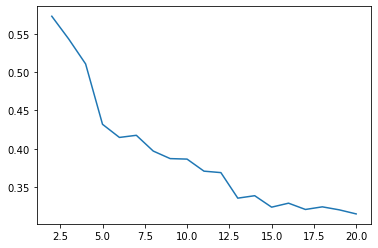

Début de Davies
20 : 0.895761796181975
--- 0.20321893692016602 seconds ---


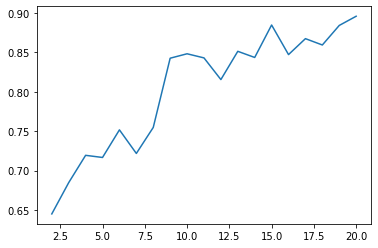

Début de Calinski
9 : 1260.5600958029913
--- 0.14414048194885254 seconds ---


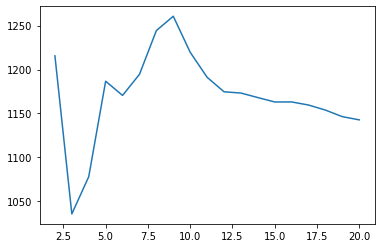

20

In [18]:
trouverKAgglo(data)

Début de Silhouette
20 : 0.36602660907903495
--- 0.06845808029174805 seconds ---


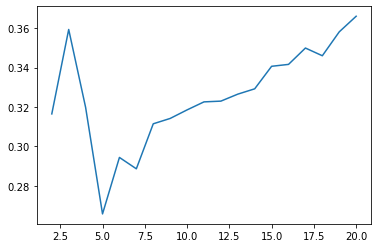

Début de Davies
2 : 1.206715319831201
--- 0.07740044593811035 seconds ---


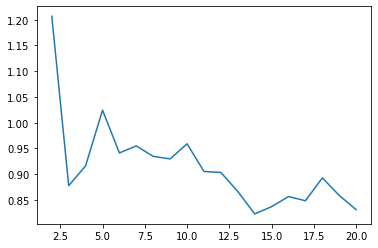

Début de Calinski
19 : 261.0115042460546
--- 0.04614901542663574 seconds ---


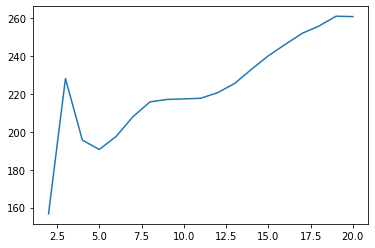

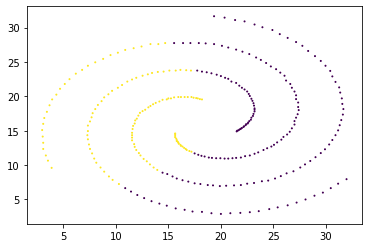

In [19]:
data = arff.loadarff(open('/home/picco/5A/Analyse Descriptive/clustering-benchmark/src/main/resources/datasets/artificial/3-spiral.arff','r'))
k = trouverKAgglo(data)
clustering = AgglomerativeClustering(n_clusters=k, linkage='ward').fit(convertirData(data))
visualisation(data, clustering.labels_)


# DBSCAN

In [20]:
from sklearn.cluster import DBSCAN

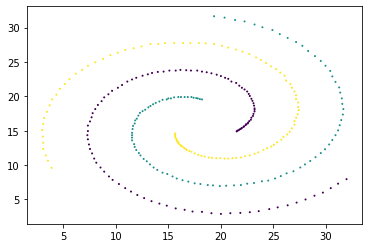

In [21]:
data = arff.loadarff(open('/home/picco/5A/Analyse Descriptive/clustering-benchmark/src/main/resources/datasets/artificial/3-spiral.arff','r'))
clustering = DBSCAN(eps=3, min_samples=2).fit(convertirData(data))
visualisation(data, clustering.labels_)



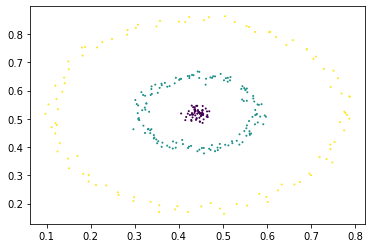

0.07927346229553223


In [22]:
data = arff.loadarff(open('/home/picco/5A/Analyse Descriptive/clustering-benchmark/src/main/resources/datasets/artificial/zelnik1.arff','r'))

start_time = time.time()
clustering = DBSCAN(eps=0.06, min_samples=5).fit(convertirData(data))
visualisation(data, clustering.labels_)
print(time.time() - start_time)


# Limite

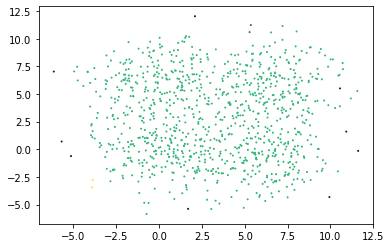

In [23]:
data = arff.loadarff(open('/home/picco/5A/Analyse Descriptive/clustering-benchmark/src/main/resources/datasets/artificial/square5.arff','r'))
clustering = DBSCAN(eps=1, min_samples=2).fit(convertirData(data))
visualisation(data, clustering.labels_)


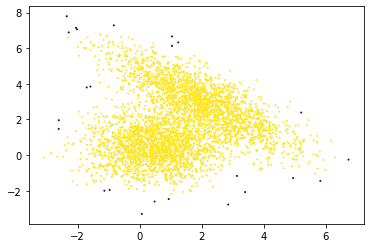

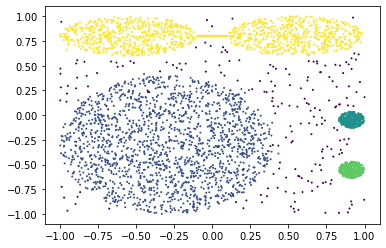

In [24]:
data = arff.loadarff(open('/home/picco/5A/Analyse Descriptive/clustering-benchmark/src/main/resources/datasets/artificial/engytime.arff','r'))
clustering = DBSCAN(eps=0.5, min_samples=5).fit(convertirData(data))
visualisation(data, clustering.labels_)

data = arff.loadarff(open('/home/picco/5A/Analyse Descriptive/clustering-benchmark/src/main/resources/datasets/artificial/cure-t2-4k.arff','r'))
clustering = DBSCAN(eps=0.05, min_samples=5).fit(convertirData(data))
visualisation(data, clustering.labels_)


# HDBSCAN

In [25]:
!pip install hdbscan

Defaulting to user installation because normal site-packages is not writeable


In [26]:
import hdbscan
from sklearn.datasets import make_blobs

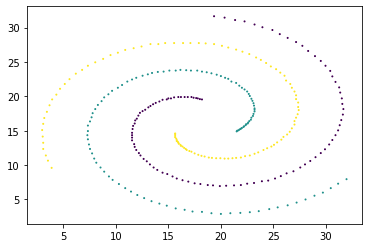

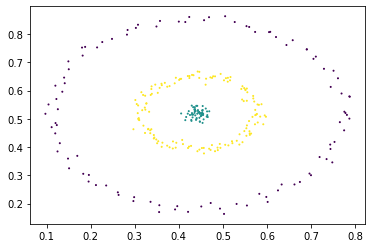

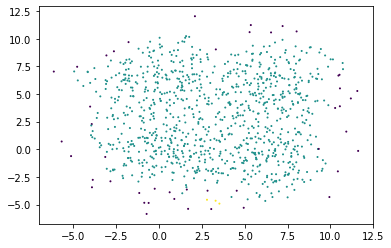

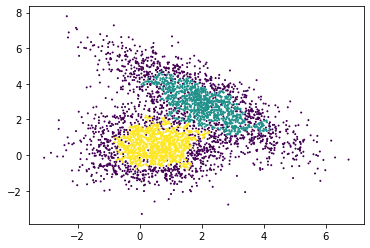

In [27]:
dataOriginale = arff.loadarff(open('/home/picco/5A/Analyse Descriptive/clustering-benchmark/src/main/resources/datasets/artificial/3-spiral.arff','r'))
data = convertirData(dataOriginale)
clusterer = hdbscan.HDBSCAN(min_cluster_size=3, min_samples=2)
label = clusterer.fit_predict(data)
visualisation(dataOriginale, label)
plt.show()

dataOriginale = arff.loadarff(open('/home/picco/5A/Analyse Descriptive/clustering-benchmark/src/main/resources/datasets/artificial/zelnik1.arff','r'))
data = convertirData(dataOriginale)
clusterer = hdbscan.HDBSCAN(min_cluster_size=3, min_samples=4)
label = clusterer.fit_predict(data)
visualisation(dataOriginale, label)
plt.show()


dataOriginale = arff.loadarff(open('/home/picco/5A/Analyse Descriptive/clustering-benchmark/src/main/resources/datasets/artificial/square5.arff','r'))
data = convertirData(dataOriginale)
clusterer = hdbscan.HDBSCAN(min_cluster_size=2, min_samples=4)
label = clusterer.fit_predict(data)
visualisation(dataOriginale, label)
plt.show()


dataOriginale = arff.loadarff(open('/home/picco/5A/Analyse Descriptive/clustering-benchmark/src/main/resources/datasets/artificial/engytime.arff','r'))
data = convertirData(dataOriginale)
clusterer = hdbscan.HDBSCAN(min_cluster_size=1000, min_samples=5)
label = clusterer.fit_predict(data)
visualisation(dataOriginale, label)
plt.show()

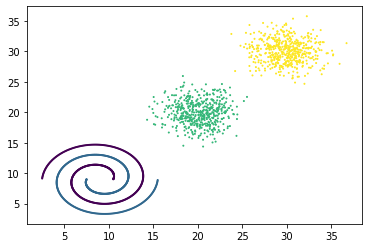

29


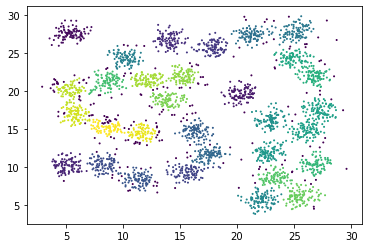

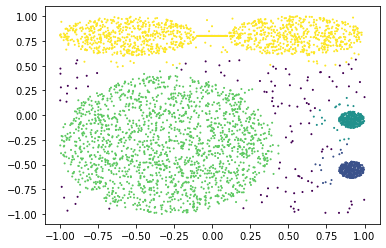

3


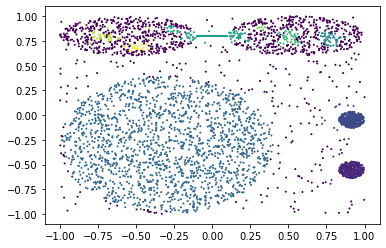

8


In [28]:
dataOriginale = arff.loadarff(open('/home/picco/5A/Analyse Descriptive/clustering-benchmark/src/main/resources/datasets/artificial/2sp2glob.arff','r'))
data = convertirData(dataOriginale)
clusterer = hdbscan.HDBSCAN(min_cluster_size=300, min_samples=2)
label = clusterer.fit_predict(data)
visualisation(dataOriginale, label)
plt.show()


dataOriginale = arff.loadarff(open('/home/picco/5A/Analyse Descriptive/clustering-benchmark/src/main/resources/datasets/artificial/D31.arff','r'))
data = convertirData(dataOriginale)
clusterer = hdbscan.HDBSCAN(min_cluster_size=50, min_samples=1)
label = clusterer.fit_predict(data)
print(max(label))
visualisation(dataOriginale, label)
plt.show()


dataOriginale = arff.loadarff(open('/home/picco/5A/Analyse Descriptive/clustering-benchmark/src/main/resources/datasets/artificial/cure-t2-4k.arff','r'))
data = convertirData(dataOriginale)
clusterer = hdbscan.HDBSCAN( min_samples=53)
label = clusterer.fit_predict(data)
visualisation(dataOriginale, label)
plt.show()
print(max(label))

dataOriginale = arff.loadarff(open('/home/picco/5A/Analyse Descriptive/clustering-benchmark/src/main/resources/datasets/artificial/cure-t2-4k.arff','r'))
data = convertirData(dataOriginale)
clusterer = hdbscan.HDBSCAN( min_samples=52)
label = clusterer.fit_predict(data)
visualisation(dataOriginale, label)
plt.show()
print(max(label))


# Synthèse

In [43]:
def points(data, labels):
    a = davies_bouldin_score(convertirData4D(data), labels)
    b = silhouette_score(convertirData4D(data), labels)
    c = calinski_harabasz_score(convertirData4D(data), labels)
    
    return a,b,c

In [30]:
def pointsPrint(data,labels):
    print("davies : "  + str(davies_bouldin_score(convertirData(data),labels)))
    print("silhouettte : " + str(silhouette_score(convertirData(data), labels)))
    print("Calinski : " + str( calinski_harabasz_score(convertirData(data), labels)))

In [41]:
def visualisation_biggerPoints(data, color):
    X, Y, Color = [], [], []

    for i in range(len(data[0])):
        #print(point)
        X.append(data[0][i][0])
        Y.append(data[0][i][1])
  

    plt.scatter(X, Y, c=color)
    plt.show()

In [76]:
def convertirData4D(data):
    X = []
    for point in data[0]:
        #print(point)
        #print(len(data[0]))
        #print(data[0][len(data[0])-1])
        X.append([point[0],point[1], point[2], point[3]])
    array = np.array(X)
    return (array)

In [57]:
import numpy as np

In [106]:
data = arff.loadarff(open('/home/picco/5A/Analyse Descriptive/clustering-benchmark/src/main/resources/datasets/real-world/iris.arff','r'))

#Kmeans
start_time = time.time()
clustering = KMeans(n_clusters=3).fit(convertirData4D(data))
print("time consumed KMEANS: " + str(-start_time + time.time()))
#visualisation_biggerPoints(data, clustering.labels_)
a = points(data,clustering.labels_)

#AGGLO
start_time = time.time()
clustering = AgglomerativeClustering(n_clusters=3).fit(convertirData4D(data))
print("time consumed AGGLO : " + str(-start_time + time.time()))
#visualisation_biggerPoints(data, clustering.labels_)
b = points(data,clustering.labels_)

#DBSCAN
start_time = time.time()
clustering = DBSCAN(eps=0.4, min_samples=3).fit(convertirData4D(data))
print("time consumed DBSCAN : " + str(-start_time + time.time()))
#visualisation_biggerPoints(data, clustering.labels_)
#max(clustering.labels_)
c = points(data,clustering.labels_)




#HDBSCAN
dataOriginale = arff.loadarff(open('/home/picco/5A/Analyse Descriptive/clustering-benchmark/src/main/resources/datasets/real-world/iris.arff','r'))
data = convertirData4D(dataOriginale)
clusterer = hdbscan.HDBSCAN( min_samples=3)
start_time = time.time()
label = clusterer.fit_predict(data)
print("time consumed HDBSCAN : " + str(-start_time + time.time()))
#visualisation_biggerPoints(dataOriginale, label)
#plt.show()
d = points(dataOriginale, label)







time consumed KMEANS: 0.019775390625
time consumed AGGLO : 0.0009469985961914062
time consumed DBSCAN : 0.0012657642364501953
time consumed HDBSCAN : 0.0024094581604003906


In [101]:
data = arff.loadarff(open('/home/picco/5A/Analyse Descriptive/clustering-benchmark/src/main/resources/datasets/real-world/iris.arff','r'))

#DBSCANBis - meilleur silhouette
scoreMax = 0
epsMax = 0
sampleMax = 0


for e in np.linspace(0.01, 1, 100):
    for s in range(1, 100):
        try:
            clustering = DBSCAN(eps=abs(e), min_samples=s).fit(convertirData4D(data))
            score = points(data, clustering.labels_)[1]
            if(score > scoreMax):
                scoreMax = score
                epsMax = e
                sampleMax = s
        except ValueError:
            z = 1
print(sampleMax)
print(scoreMax)
        

clustering = DBSCAN(eps=epsMax, min_samples=sampleMax).fit(convertirData4D(data)) 
e = points(data,clustering.labels_)

1
0.6863930543204848


In [89]:
#HBSCANBis - meilleur silhouette

dataOriginale = arff.loadarff(open('/home/picco/5A/Analyse Descriptive/clustering-benchmark/src/main/resources/datasets/real-world/iris.arff','r'))
data = convertirData4D(dataOriginale)


scoreMax = 0
sampleMax = 0


for s in range(1, 100):
    try:
        clusterer = hdbscan.HDBSCAN( min_samples=s)
        label = clusterer.fit_predict(data)
        score = points(dataOriginale, label)[1]
        if(score > scoreMax):
            scoreMax = score
            sampleMax = s
    except ValueError:
        z = 1

        
print(sampleMax)
clusterer = hdbscan.HDBSCAN( min_samples=sampleMax)
label = clusterer.fit_predict(data)
f = points(dataOriginale,label)

1


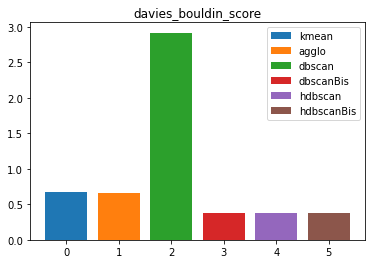

0.6663912107101436
0.656604412417845
2.915626079355616
0.3835952094491441
0.3835952094491441
0.3835952094491441


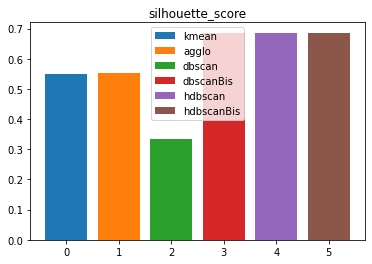

0.5509643746420473
0.5540972907866913
0.3346215223427425
0.6863930543204848
0.6863930543204848
0.6863930543204848


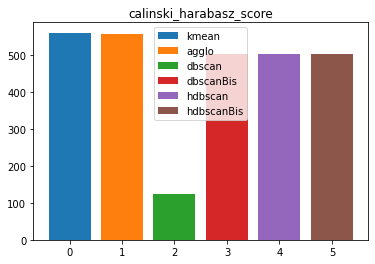

560.3660038653592
556.8411216363928
122.96453164696413
501.9248640964319
501.9248640964319
501.9248640964319


In [88]:
title = ["davies_bouldin_score", "silhouette_score", "calinski_harabasz_score"]
    
for i in range(3):
    plt.bar(0, a[i])
    plt.bar(1, b[i])
    plt.bar(2, c[i])
    plt.bar(3, e[i])
    plt.bar(4, d[i])
    plt.bar(5, f[i])
    plt.legend(["kmean", "agglo", "dbscan", "dbscanBis", "hdbscan", "hdbscanBis"])
    plt.title(title[i])
    plt.show()
    
    print(a[i])
    print(b[i])
    print(c[i])
    print(e[i])
    print(d[i])
    print(f[i])

# Mystère

In [91]:
import pandas

In [ ]:
def visualisation3D

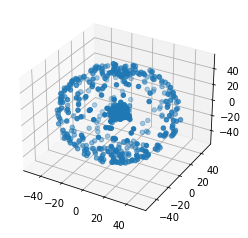

2


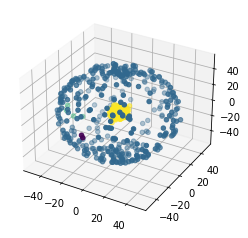

In [131]:
# data1
data = pandas.read_csv('/home/picco/5A/Analyse Descriptive/clustering-benchmark/dataset/a.data', sep="\t", header=None)

# brute
ax = plt.axes(projection='3d')
ax.scatter3D(data[0], data[1], data[2])
plt.show()

#traitée
ax = plt.axes(projection='3d')
clustering = DBSCAN(eps=13, min_samples=3).fit(data)
print(max(clustering.labels_))
ax.scatter3D(data[0], data[1], data[2], c=clustering.labels_)
plt.show()



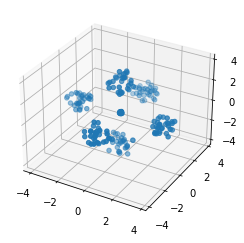

6


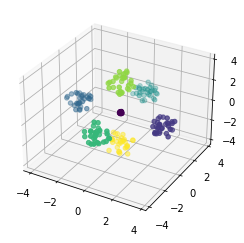

In [139]:
# data2
data = pandas.read_csv('./dataset/h.data', sep="\t", header=None)

# brute
ax = plt.axes(projection='3d')
ax.scatter3D(data[0], data[1], data[2])
plt.show()

#traitée
ax = plt.axes(projection='3d')
clustering = DBSCAN(eps=2, min_samples=3).fit(data)
print(max(clustering.labels_))
ax.scatter3D(data[0], data[1], data[2], c=clustering.labels_)
plt.show()


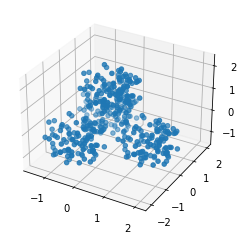

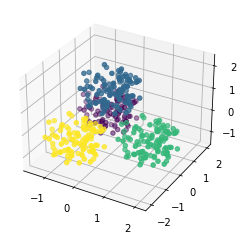

In [142]:
# data2
data = pandas.read_csv('./dataset/t.data', sep="\t", header=None)

# brute
ax = plt.axes(projection='3d')
ax.scatter3D(data[0], data[1], data[2])
plt.show()

#traitée
ax = plt.axes(projection='3d')
clustering = KMeans(n_clusters=4).fit(data)
ax.scatter3D(data[0], data[1], data[2], c=clustering.labels_)
plt.show()


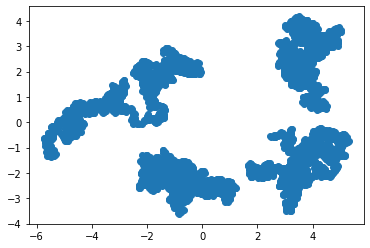

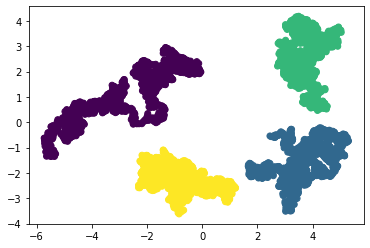

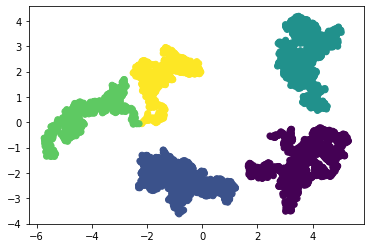

In [150]:
# data2
data = pandas.read_csv('./dataset/tr.data', sep=" ", header=None)

# brute
plt.scatter(data[0], data[1])
plt.show()

#traitée
clustering = AgglomerativeClustering(n_clusters=4).fit(data)
plt.scatter(data[0], data[1], c=clustering.labels_)
plt.show()


#traitée
clustering = AgglomerativeClustering(n_clusters=5).fit(data)
plt.scatter(data[0], data[1], c=clustering.labels_)
plt.show()

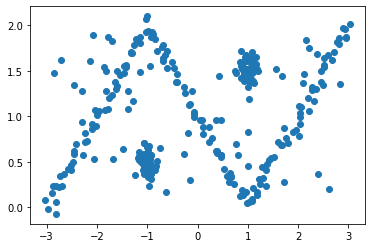

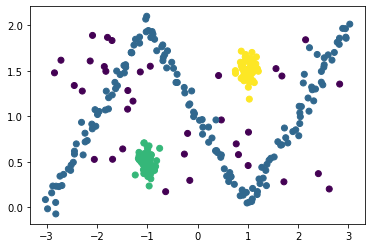

In [164]:
# data2
data = pandas.read_csv('./dataset/zgn.data', sep=" ", header=None)

# brute
plt.scatter(data[0], data[1])
plt.show()

#traitée
clustering = DBSCAN(eps=0.2, min_samples=4).fit(data)
plt.scatter(data[0], data[1], c=clustering.labels_)
plt.show()


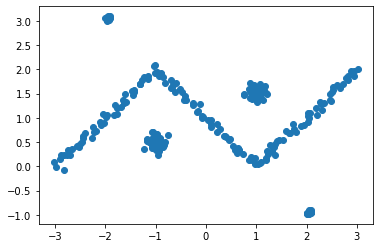

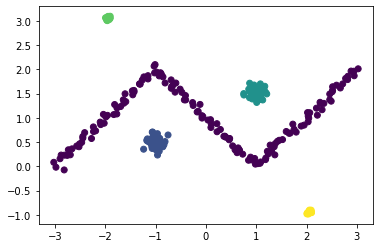

In [165]:
# data2
data = pandas.read_csv('./dataset/zgo.data', sep=" ", header=None)

# brute
plt.scatter(data[0], data[1])
plt.show()

#traitée
clustering = DBSCAN(eps=0.2, min_samples=4).fit(data)
plt.scatter(data[0], data[1], c=clustering.labels_)
plt.show()
